# Application to component 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pth
from PIL.Image import *
from matplotlib import cm
from PIL import Image
import cv2

## XY image

### Thresholding

In [92]:
"""defect detection"""

def detect(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    #img = cv2.medianBlur(img,5) #blur  to make the transition smooth from color to color
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB for real image plot
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)

    
    return res

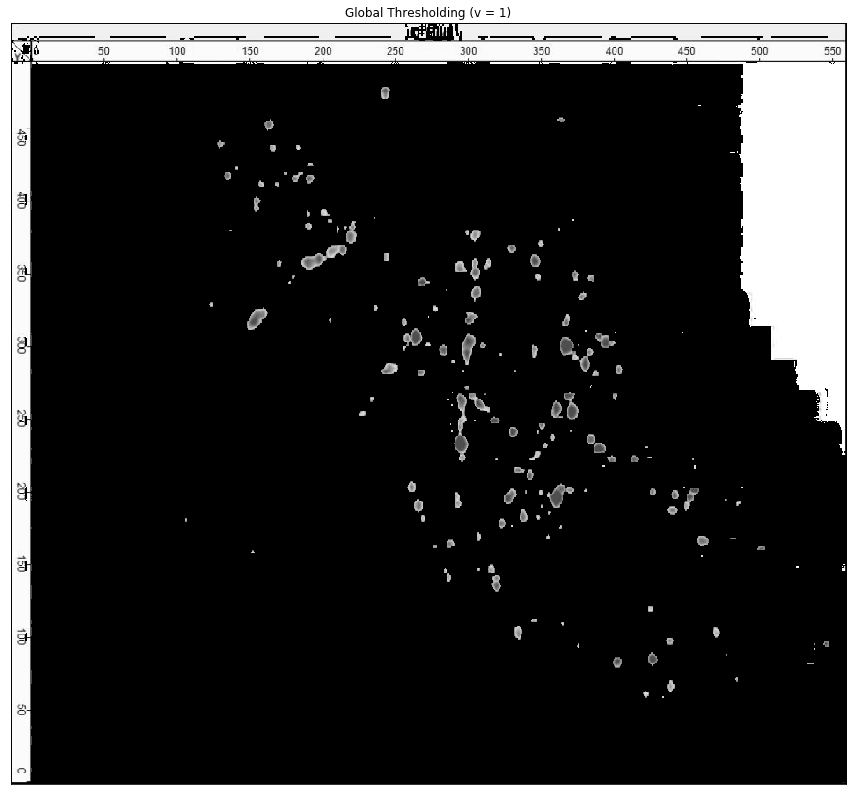

In [93]:
'''Functions call'''


path = "H:/ali/overview_2/Komponent2/xy.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

res = detect(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

title = 'Global Thresholding (v = 1)'
image = imgray

plt.figure(1, figsize=(12, 12))
plt.imshow(image,'gray')
plt.title(title)
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

In [94]:
print(image.shape)

(866L, 950L)


### Image frame

In [95]:
def multiple_imshow(rows,cols,images ,titles):

    plt.figure(len(images), figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
         
    plt.show()
    
def shaping(image,i,j,resol = [300,300]):
    
    img = image
    rows,cols = img.shape
    
    frame = [[0,0],[cols,0],[0,rows],[cols,rows]]
    dimension = [[0,0],[resol[1],0],[0,resol[0]],[resol[1],resol[0]]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)
    shaped = cv2.warpPerspective(img,M,(j,i))
    
    return shaped


#### Determining 'i'

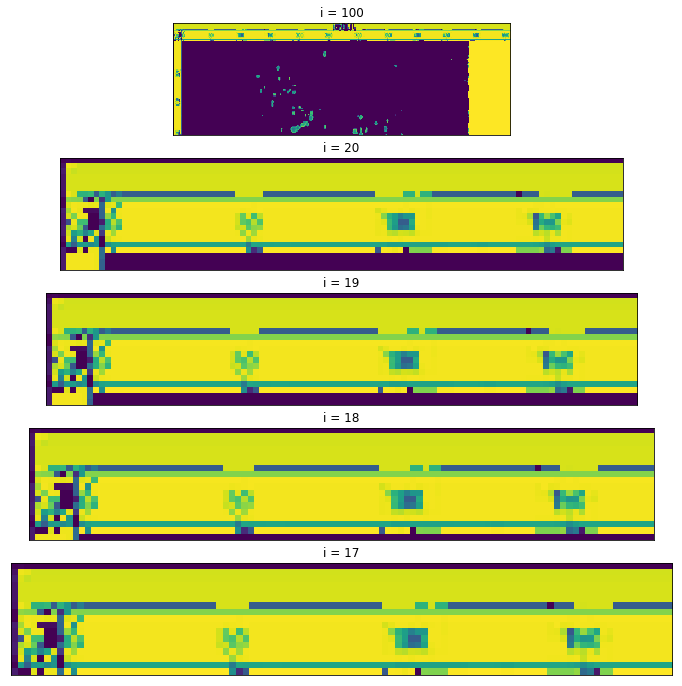

In [96]:
images = [shaping(image,100,300),shaping(image,20,100),shaping(image,19,100),shaping(image,18,100),shaping(image,17,100)]
titles = ['i = 100','i = 20','i = 19','i = 18','i = 17']

multiple_imshow(5,1,images ,titles)

#### Determining 'j'

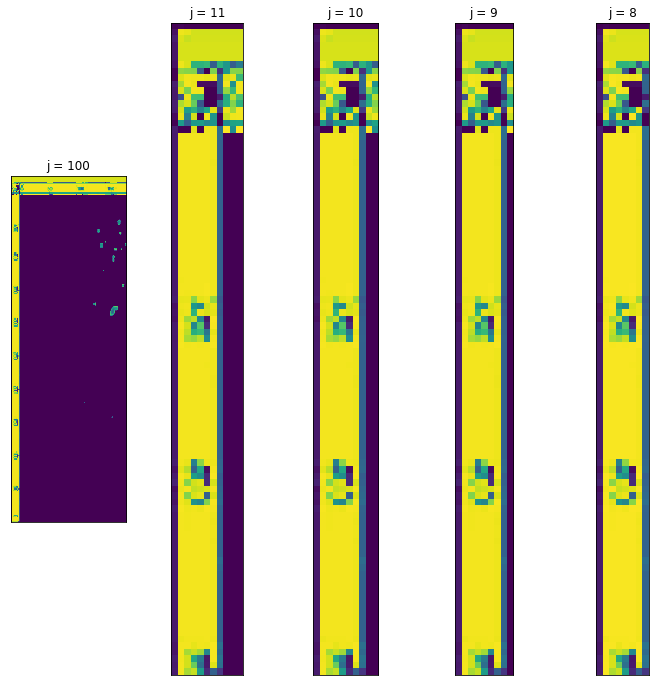

In [97]:
images = [shaping(image,300,100),shaping(image,100,11),shaping(image,100,10),shaping(image,100,9),shaping(image,100,8)]
titles = ['j = 100','j = 11','j = 10','j = 9','j = 8']

multiple_imshow(1,5,images ,titles)

#### output: 

i = 8 & j = 17 for a [300,300] resolution image

### Scaling the image

In [98]:
def multiple_imshow(rows,cols,images ,titles):

    plt.figure(len(images), figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        #plt.xticks([]),plt.yticks([]) 
    plt.show()

def defect_detection(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    return res


def pre_shaping(image,resol = [305,366]):
    
    img = image
    rows,cols = img.shape
    
    frame = [[0,0],[cols,0],[0,rows],[cols,rows]]
    dimension = [[0,0],[resol[1],0],[0,resol[0]],[resol[1],resol[0]]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)
    pre_shaped = cv2.warpPerspective(img,M,(resol[1],resol[0]))
    
    return pre_shaped


def real_shaping(normalized_image,rows_dim,cols_dim,i = 8,j = 17):
    
    img = normalized_image
    rows,cols = img.shape
    
    frame = [[i,j],[rows,j],[i,cols],[rows,cols]]
    dimension = [[0,0],[cols_dim,0],[0,rows_dim],[cols_dim,rows_dim]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)

    real_shape = cv2.warpPerspective(img,M,(cols_dim,rows_dim))
    
    return real_shape

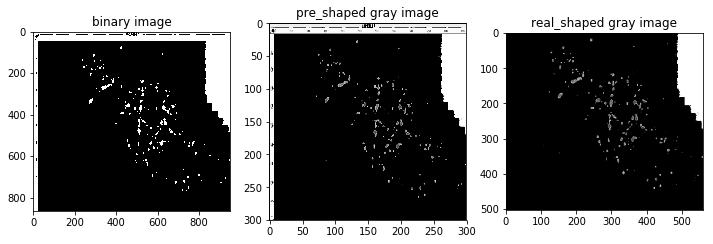

In [99]:
'''Functions call'''

path = "H:/ali/overview_2/Komponent2/xy.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound = [50,255,255] # for more defects the upper bound can go till ~105

res = defect_detection(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

title = 'Global Thresholding (v = 1)'


'''shaping'''
#binary image
#img = pre_shaping(thresh,resol = [300,300])
#gray image
img = pre_shaping(imgray,resol = [300,300])
images = [thresh,img,real_shaping(img,503,560)]#i,j --> y,x
titles = ['binary image','pre_shaped gray image','real_shaped gray image']

multiple_imshow(1,3,images ,titles)

In [100]:
def defect_centers(shaped_img):
    
    img = shaped_img
    img[img>50]= 255
   
    return img


(503L, 560L)


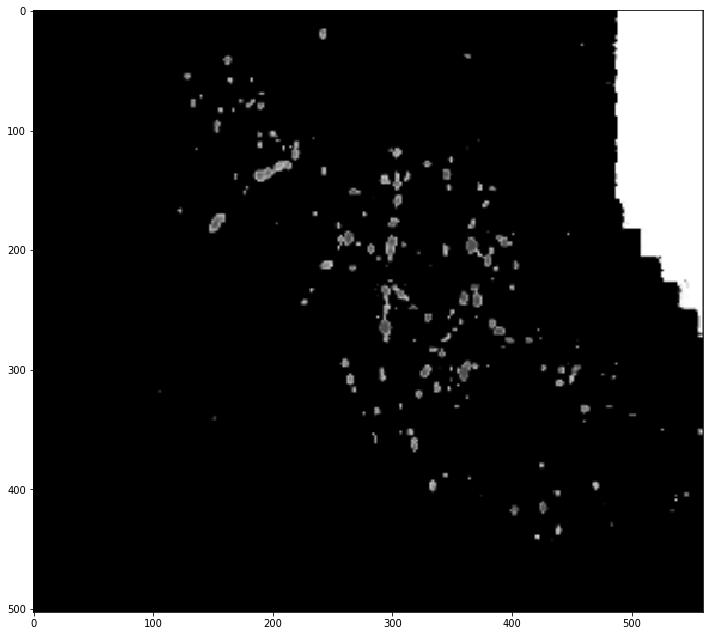

In [101]:
component_2_img = real_shaping(img,503,560)
print(component_2_img.shape)
plt.figure(1, figsize=(12, 12))
plt.imshow(component_2_img,'gray')
plt.show()

In [102]:
component_2_img[150,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  55,  61,  43,  24,   

## Extrema

### import

In [103]:
from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure


source:
https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_extrema.html

In [104]:
'''Should be a gray image'''
extrema_img = component_2_img

In [105]:
'''
#https://en.wikipedia.org/wiki/Image_scaling
# the rescaling is done only for visualization purpose.
# the algorithms would work identically in an unscaled version of the
# image. However, the parameter h needs to be adapted to the scale.
'''
img = exposure.rescale_intensity(extrema_img)


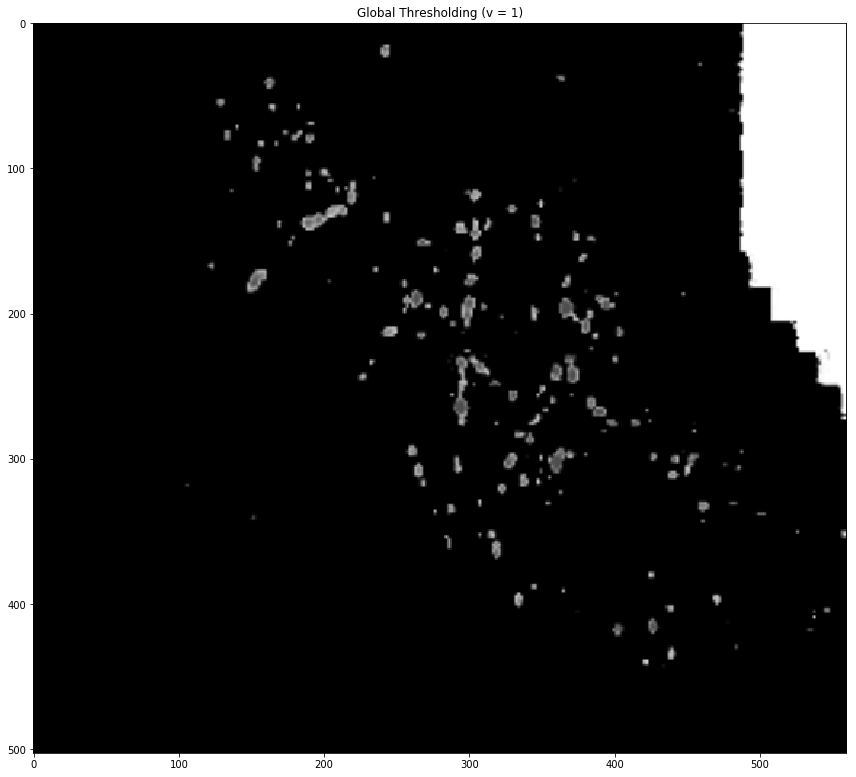

In [106]:
#res = defect_centers(component_2_img)

plt.figure(1, figsize=(12, 12))
plt.imshow(img,'gray')
plt.title(title)
#plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

### MAXIMA DETECTION

In [107]:
# Maxima in the galaxy image are detected by mathematical morphology.
# There is no a priori constraint on the density.

# We find all local maxima
local_maxima = extrema.local_maxima(img)
label_maxima = label(local_maxima)
overlay = color.label2rgb(label_maxima, img, alpha=0.7, bg_label=0,
                          bg_color=None, colors=[(1, 1, 0)]);


In [108]:
# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the gray level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h =1
h_maxima = extrema.h_maxima(img, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(label_h_maxima, img, alpha=0.7, bg_label=0,
                            bg_color=None, colors=[(1, 0, 0)])


### GRAPHICAL OUTPUT

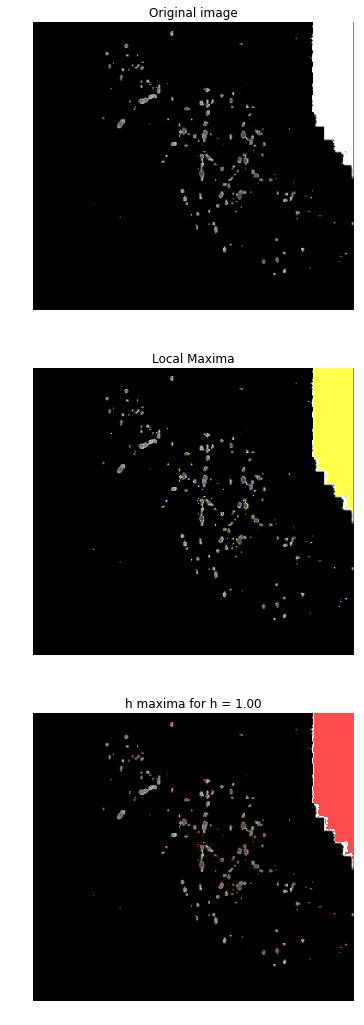

In [109]:
# a new figure with 3 subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

ax[0].imshow(img, cmap='gray', interpolation='none')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay, interpolation='none')
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h, interpolation='none')
ax[2].set_title('h maxima for h = %.2f' % h)
ax[2].axis('off')
plt.show()


In [110]:
local_maxima[:-1].shape 

(502L, 560L)

In [111]:
local_maxima.shape 

(503L, 560L)

### Algorithm for MAXIMA DETECTION

Every defect has a minimum defined according to certain window dimention i.e 3*3

1/ defect detection --> img = 1 defect --> size --> angle

2/ if len(img)> threshold then 

3/divide it to sub defects according to the choosen window minimum detection

In [112]:
print(np.average(imgray[300,:]))

38.78631578947368


### Results

In [113]:
def add_neighbours_in_stack(image, a, b, stack, i, j, inComponent):

    inComponent[i, j] = True
    neighbours = [(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    #neighbours = [(i-1,j-1),(i+1,j-1),(i+1,j),(i-1,j),(i,j-1),(i,j+1),(i-1,j+1),(i+1,j+1)]
    for (k,l) in neighbours:
        if 0<=k<image.shape[0] and 0<=l<image.shape[1]:
            if (image[k,l]>a and image[k,l]<b) and not inComponent[k, l]:
                inComponent[k, l] = True
                stack.append((k,l))

def connected_component_nb(image, seuil, i0,j0, inComponent):
    stack = [(i0,j0)]
    nb=1
    barycentre = [i0,j0]
    while len(stack)>0:
        (i,j) = stack.pop()
        nb+=1  
        add_neighbours_in_stack(image, seuil, 256, stack, i, j, inComponent)
          
        barycentre[0] += i
        barycentre[1] += j
            
    barycentre[0] /= nb
    barycentre[1] /= nb   
    return nb, barycentre


def all_connected_components(image, seuil):

    inComponent = np.empty(image.shape, dtype=np.bool)
    inComponent[:, :] = False

    baryAndSizes = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>seuil and not inComponent[i,j]:
                baryAndSizes.append(connected_component_nb(image,seuil,i,j,inComponent))
                

    return baryAndSizes


def step2(image):
    
    imageR = image
    imageB = image
    
    fig, ax = plt.subplots(1,2, figsize = (22,12))
    fig.suptitle('Results', fontsize=16)
    ax[0].set_xlim(0,imageR.shape[1])
    ax[1].set_xlim(0,imageB.shape[1])

    baryAndSizesR = all_connected_components(imageR, 1)
    baryAndSizesB = all_connected_components(imageB, 1)
    
    xR, xB = np.array([]), np.array([])
    yR, yB = np.array([]), np.array([])
    sizeR, sizeB = np.array([]), np.array([])
    
    for i in range(len(baryAndSizesR)):
        xR = np.append(xR, baryAndSizesR[i][1][0])
        yR = np.append(yR, baryAndSizesR[i][1][1])
        sizeR = np.append(sizeR, baryAndSizesR[i][0])
    
    for i in range(len(baryAndSizesB)):
        xB = np.append(xB, baryAndSizesB[i][1][0])
        yB = np.append(yB, baryAndSizesB[i][1][1])
        sizeB = np.append(sizeB, baryAndSizesB[i][0])
    
    title = ['Detected defects centers','Detected defects as discs']
    ax[0].imshow(imageR, cmap='gray', vmin = 0, vmax = 255,)
    ax[0].scatter(yR, xR, marker='+', s=sizeR, c = 'r', alpha = 0.5)
    ax[0].set_title(title[0])
    
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    ax[1].imshow(imageB, cmap='gray', vmin = 0, vmax = 255,)
    ax[1].scatter(yB, xB, marker='o', s=sizeB, c = 'b', alpha = 0.5)
    ax[1].set_title(title[1])
    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
           
    plt.show()
    
    return yR, xR, sizeR
    

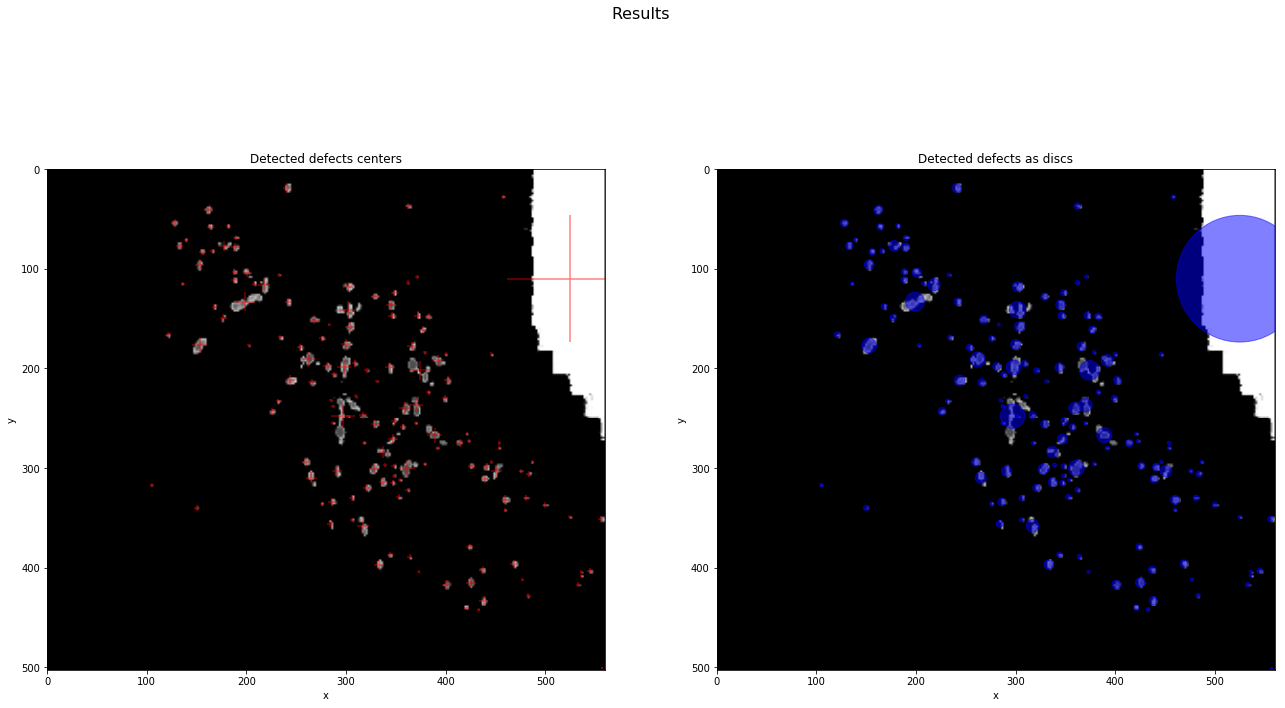

In [114]:
'''Call function'''
image = component_2_img
x, y,area = step2(image)

### Enhancements

https://www.quora.com/What-are-the-differences-between-RGB-HSV-and-CIE-Lab

The obtained centers are not accurete, one can use the k-mean method for mor accuracy.
1/the algorithm of k-mean depends on the starting centers, so the obtained centers are a good start for a satisfying? convergence.
2/the k-mean algorithm could be also used to sperate into clusters accoring to local minimas.

how to find minimas?

### Each defect

In [118]:
def add_neighbours_in_stack(image, a, b, stack, i, j, inComponent):

    inComponent[i, j] = True
    neighbours = [(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    #neighbours = [(i-1,j-1),(i+1,j-1),(i+1,j),(i-1,j),(i,j-1),(i,j+1),(i-1,j+1),(i+1,j+1)]
    for (k,l) in neighbours:
        if 0<=k<image.shape[0] and 0<=l<image.shape[1]:
            if (image[k,l]>a and image[k,l]<b) and not inComponent[k, l]:
                inComponent[k, l] = True
                stack.append((k,l))
    return 

def connected_component_nb(image, seuil, i0,j0, inComponent):
    stack = [(i0,j0)]
    defect = []
    nb=1
    barycentre = [i0,j0]
    while len(stack)>0:
        (i,j) = stack.pop()
        defect.append((i,j))
        nb+=1  
        add_neighbours_in_stack(image, seuil, 256, stack, i, j, inComponent)
          
        barycentre[0] += i
        barycentre[1] += j
            
    barycentre[0] /= nb
    barycentre[1] /= nb
    
    return nb, barycentre,defect


def all_connected_components(image, seuil):

    inComponent = np.empty(image.shape, dtype=np.bool)
    inComponent[:, :] = False

    baryAndSizes = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>seuil and not inComponent[i,j]:
                baryAndSizes.append(connected_component_nb(image,seuil,i,j,inComponent))
                
    return baryAndSizes


def step2(image,defect_nb):
    
    imageR = image
    imageB = image

    baryAndSizesR = all_connected_components(imageR, 0)
    baryAndSizesB = all_connected_components(imageB, 0)
    
    xR, xB = np.array([]), np.array([])
    yR, yB = np.array([]), np.array([])
    sizeR, sizeB = np.array([]), np.array([])
    
    
    for i in range(len(baryAndSizesR)):
        xR = np.append(xR, baryAndSizesR[i][1][0])
        yR = np.append(yR, baryAndSizesR[i][1][1])
        sizeR = np.append(sizeR, baryAndSizesR[i][0])
    
    for i in range(len(baryAndSizesB)):
        xB = np.append(xB, baryAndSizesB[i][1][0])
        yB = np.append(yB, baryAndSizesB[i][1][1])
        sizeB = np.append(sizeB, baryAndSizesB[i][0])
    
    '''plot'''
    fig, ax = plt.subplots(1,3, figsize = (22,12))
    fig.suptitle('Results', fontsize=16)
    ax[0].set_xlim(0,imageR.shape[1])
    ax[1].set_xlim(0,imageB.shape[1])
    ax[2].set_xlim(0,imageB.shape[1])
    
    title = ['Detected defects centers','Detected defects as discs']
    ax[0].imshow(imageR, cmap='gray', vmin = 0, vmax = 255,)
    ax[0].scatter(yR, xR, marker='+', s=sizeR, c = 'r', alpha = 0.5)
    ax[0].set_title(title[0])
    
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    ax[1].imshow(imageB, cmap='gray', vmin = 0, vmax = 255,)
    ax[1].scatter(yB, xB, marker='o', s=sizeB, c = 'b', alpha = 0.5)
    ax[1].set_title(title[1])
    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    
    '''test the variation''' 
    test = np.array([])
    test = baryAndSizesB[defect_nb][2] #defect number 10
    test_x = np.ndarray(len(test),dtype='uint8')
    test_y = np.ndarray(len(test),dtype='uint8')
    for i in range(len(test)):
        test_x[i] = test[i][1] #x axis
        test_y[i] = test[i][0] #y axis
    
    ax[2].imshow(imageR, cmap='gray', vmin = 0, vmax = 255,)
    ax[2].scatter(test_x, test_y, marker='o', s=1, c = 'b', alpha = 0.5)
    
    test = np.stack((test_y, test_x), axis=-1)
    
    plt.show()
    
    return yR, xR, sizeR,test

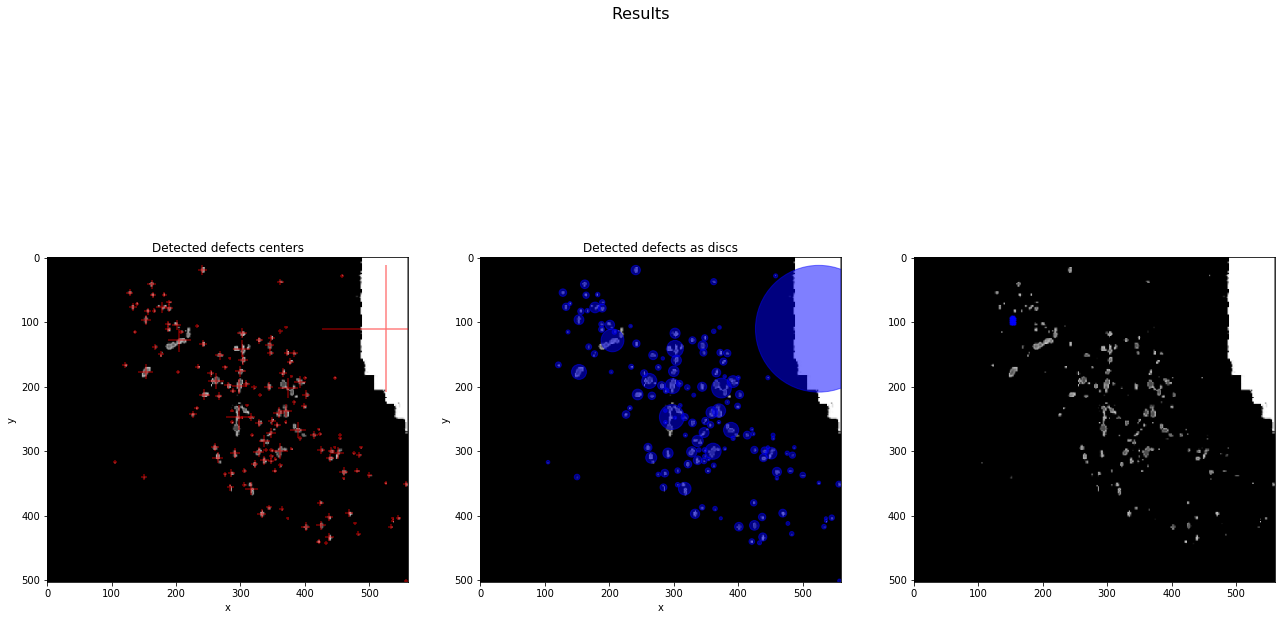

96

In [119]:
'''Call function'''
image = component_2_img
x, y,area ,test= step2(image,15)
len(test)



### Case study: i.e defect 15

In [121]:
print(test.shape)
print(image[test[:,0],test[:,1]])
t = image
o = np.zeros_like(image)
o[test[:,0],test[:,1]]=t[test[:,0],test[:,1]]

o[test[:,0],test[:,1]]


(96L, 2L)
[  2  10  25  22   7  26   2  37   7  19  18  96 144 136 121  98  65  19
  17   8  26  65 129 124   2  19  16  53  93 140 125  70  32   6   2  13
   2   3   1   8  41 118 137  68  27   8  15  17  57  97 141 115   3  52
  12   1   4   9   7   2  91  38 137  86 114  74  48  24   3   1  45  15
  35 120 149  90  47  14  58  65  90 100 119 126 138 129 149 117  74  14
 100  75  88 100  38   7]


array([  2,  10,  25,  22,   7,  26,   2,  37,   7,  19,  18,  96, 144,
       136, 121,  98,  65,  19,  17,   8,  26,  65, 129, 124,   2,  19,
        16,  53,  93, 140, 125,  70,  32,   6,   2,  13,   2,   3,   1,
         8,  41, 118, 137,  68,  27,   8,  15,  17,  57,  97, 141, 115,
         3,  52,  12,   1,   4,   9,   7,   2,  91,  38, 137,  86, 114,
        74,  48,  24,   3,   1,  45,  15,  35, 120, 149,  90,  47,  14,
        58,  65,  90, 100, 119, 126, 138, 129, 149, 117,  74,  14, 100,
        75,  88, 100,  38,   7], dtype=uint8)

### Extremum: defect 15

#### Extremum 1D

http://jessicastringham.net/2017/12/31/stride-tricks.html

In [160]:
print o[0,:].shape[:-1]
print o.shape[:-1]+(10,)
print o.shape
print o.strides + (o.strides[-1],)

() + (1,1)

()
(503L, 10)
(503L, 560L)
(560L, 1L, 1L)


(1, 1)

In [144]:
def rolling_window(data, window_length):
    output_shape = data.shape[:-1] + (data.shape[-1] - window_length + 1, window_length)
    strides = data.strides + (data.strides[-1],)
    return np.lib.stride_tricks.as_strided(data, shape=output_shape, strides=strides)

In [161]:
data=np.eye(8)
#data= data[0,:]
data

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [159]:
roll=rolling_window(data,3)
roll

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [156]:
roll.shape

(6L, 3L)

In [162]:
def findLocalMax(data,windowLength,alsoDetectBorderPick=False):
    dataRoll=rolling_window(data,windowLength)
    armax=np.argmax(dataRoll,axis=1)
    where=np.where(armax==(windowLength//2))
    res = where[0]+windowLength//2
    if alsoDetectBorderPick:
        if armax[0]==0:
            res = np.append(res, 0)
        if armax[-1]==windowLength-1:
            res = np.append(res, len(data)-1)
    return np.sort(res)

[ 0  4 12 19]


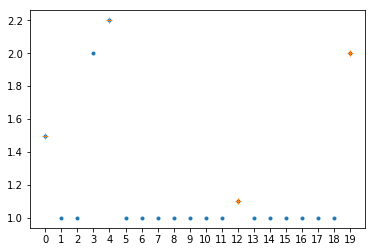

In [163]:
"""programme de test. 
Quel formule relie data.shape, windowLength et dataRoll.shape ?
Réponse : donnée ci-dessus
"""
data=np.ones(20)
data[0]=1.5
data[3]=2
data[4]=2.2
data[12]=1.1
data[-1]=2
plt.plot(range(len(data)),data,".");
plt.xticks(range(len(data)));

locMax=findLocalMax(data,3, True)
print(locMax)
plt.plot(locMax,data[locMax],"+");

#### Extremum 2D

In [ ]:
def rolling_windows_img(a,kshape):
    outShape=(a.shape[0]-kshape[0]+1,)+(a.shape[1]-kshape[1]+1,)+kshape
    outStrides=a.strides+a.strides
    return np.lib.stride_tricks.as_strided(a,shape=outShape,strides=outStrides)

def convolution2Dbis(image, mask):
    rolling = rolling_windows_img(image,mask.shape)
    pre_imageConv = rolling * mask[np.newaxis,np.newaxis,:,:]
    return np.sum(pre_imageConv,axis=(2,3))
    

### Features extraction: angle, a and b

http://www.visiondummy.com/2014/05/feature-extraction-using-pca/

### Cordinates have to be converted to the component reference (503-y)

In [54]:
coord = np.stack((x, 503-y), axis=-1)
print(len(coord))
print('cordinates are =',coord)
print('area is =',area)
print(len(area)== len(coord))


146
('cordinates are =', array([[525., 393.],
       [241., 484.],
       [458., 475.],
       [162., 462.],
       [362., 466.],
       [128., 449.],
       [164., 445.],
       [182., 446.],
       [189., 434.],
       [139., 432.],
       [133., 427.],
       [178., 426.],
       [189., 425.],
       [156., 420.],
       [166., 421.],
       [153., 407.],
       [188., 400.],
       [201., 399.],
       [233., 397.],
       [205., 375.],
       [371., 395.],
       [188., 392.],
       [208., 388.],
       [362., 389.],
       [136., 388.],
       [302., 386.],
       [348., 379.],
       [329., 375.],
       [242., 370.],
       [345., 367.],
       [302., 362.],
       [168., 365.],
       [372., 356.],
       [346., 356.],
       [177., 354.],
       [383., 355.],
       [268., 352.],
       [304., 344.],
       [283., 347.],
       [377., 342.],
       [121., 337.],
       [234., 334.],
       [276., 333.],
       [153., 326.],
       [300., 327.],
       [366., 325.],
       [2

### Data reduction

In [55]:
def data_reduction(polygon,coordinates,area):
    old_dim = len(coordinates)
    p = pth.Path(polygon)
    mask = p.contains_points(coordinates)
    reduced_coord = coordinates[mask]
    reduced_area = area[mask]
    new_dim = len(reduced_coord)
    print(old_dim-new_dim,' values were reduced')
    return reduced_coord,reduced_area

In [ ]:
'''Function call'''

area = area
coordinates = np.stack((x, y), axis=-1) #according to imshow matplotlib plot
polygon =np.array([[0,0],[500,0],[500,503],[0,503]])
reduced_coord, reduced_area = data_reduction(polygon,coordinates,area)


In [ ]:
print(len(reduced_coord))

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (22,12))
fig.suptitle('Results', fontsize=16)
ax[0].set_xlim(0,image.shape[1])
ax[1].set_xlim(0,image.shape[1])
    
title = ['Reduced defects centers','Reduced defects as discs']
ax[0].imshow(image, cmap='gray', vmin = 0, vmax = 255,)
ax[0].scatter(reduced_coord[:,0], reduced_coord[:,1], marker='+', s=reduced_area, c = 'r', alpha = 0.5)
ax[0].set_title(title[0])

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].imshow(image, cmap='gray', vmin = 0, vmax = 255,)
ax[1].scatter(reduced_coord[:,0], reduced_coord[:,1], marker='o', s=reduced_area, c = 'b', alpha = 0.5)
ax[1].set_title(title[1])

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.show()

## Exported file

In [ ]:
output_coord = np.stack((reduced_coord[:,0], 503-reduced_coord[:,1]), axis=-1)
print(len(reduced_coord))
print('cordinates are =',output_coord)
print('area is =',reduced_area)
print(len(area)== len(coord))


In [ ]:
%reset

## XZ image

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pth
from PIL.Image import *
from matplotlib import cm
from PIL import Image
import cv2

### Thresholding

In [69]:
"""defect detection"""

def detect(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    #img = cv2.medianBlur(img,5) #blur  to make the transition smooth from color to color
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB for real image plot
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    return res

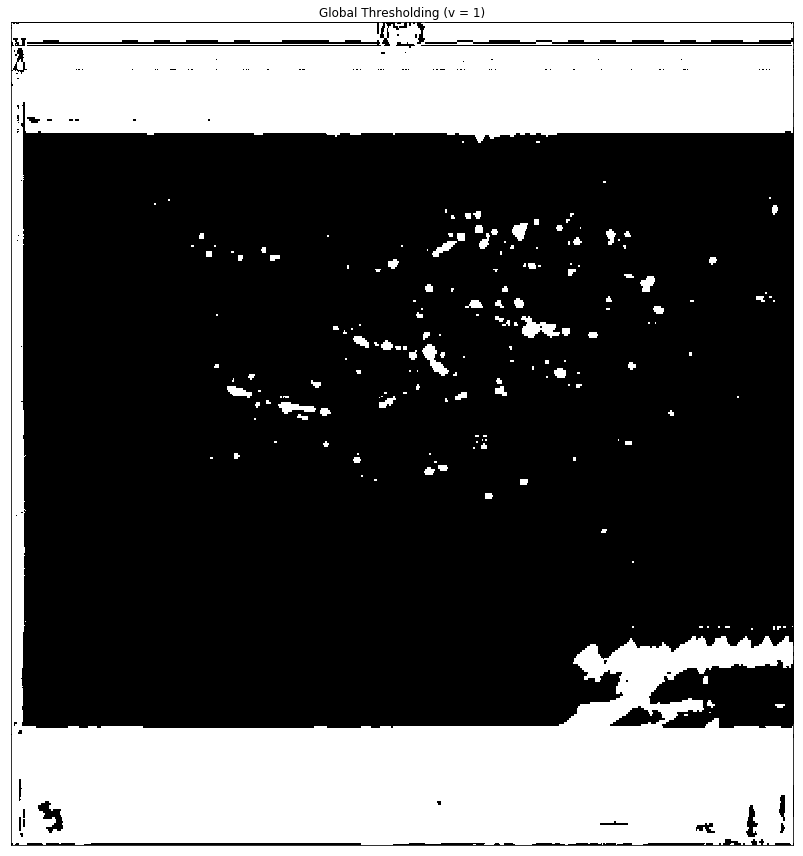

In [71]:
'''Functions call'''


path = "H:/ali/overview_2/Komponent2/xz.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

res = detect(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

title = 'Global Thresholding (v = 1)'
image = thresh

plt.figure(1, figsize=(12, 12))
plt.imshow(image,'gray')
plt.title(title)
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

### Image frame

In [72]:
def multiple_imshow(rows,cols,images ,titles):

    plt.figure(len(images), figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
         
    plt.show()
    
def shaping(image,i,j,resol = [300,300]):
    
    img = image
    rows,cols = img.shape
    
    frame = [[0,0],[cols,0],[0,rows],[cols,rows]]
    dimension = [[0,0],[resol[1],0],[0,resol[0]],[resol[1],resol[0]]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)
    shaped = cv2.warpPerspective(img,M,(j,i))
    
    return shaped


#### Determining 'i'

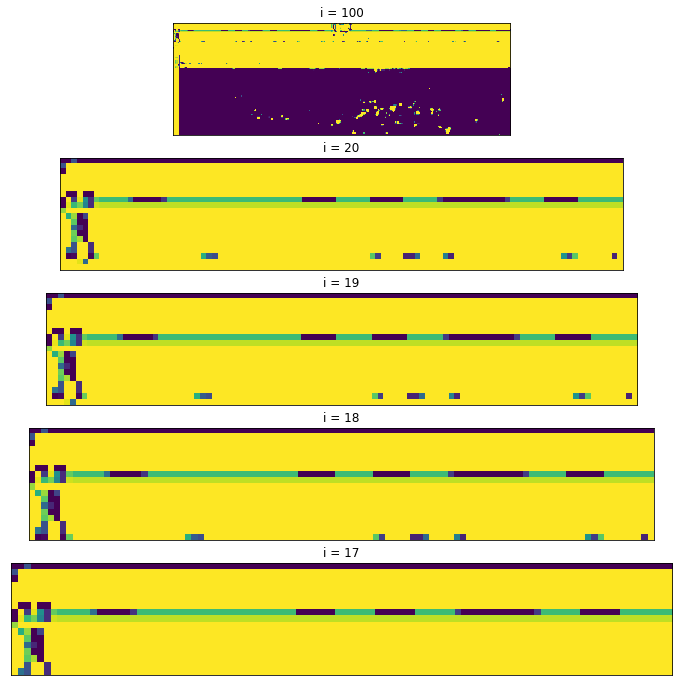

In [73]:
images = [shaping(image,100,300),shaping(image,20,100),shaping(image,19,100),shaping(image,18,100),shaping(image,17,100)]
titles = ['i = 100','i = 20','i = 19','i = 18','i = 17']

multiple_imshow(5,1,images ,titles)

#### Determining 'j'

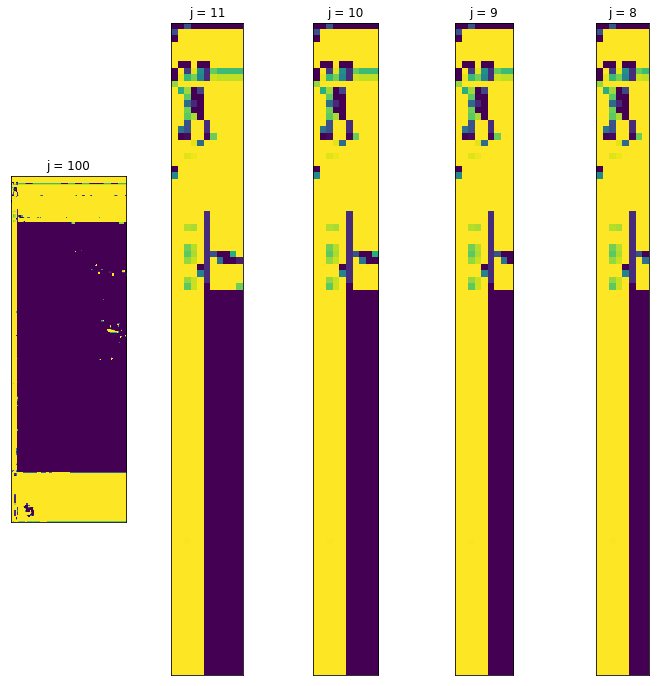

In [74]:
images = [shaping(image,300,100),shaping(image,100,11),shaping(image,100,10),shaping(image,100,9),shaping(image,100,8)]
titles = ['j = 100','j = 11','j = 10','j = 9','j = 8']

multiple_imshow(1,5,images ,titles)

#### output: 

i = 8 & j = 17 for a [300,300] resolution image

### Scaling the image

In [75]:
def multiple_imshow(rows,cols,images ,titles):

    plt.figure(len(images), figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        #plt.xticks([]),plt.yticks([]) 
    plt.show()

def defect_detection(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    ''' comparison'''
    
    res_defects=np.where(res != 0)
    img_comparison = np.copy(img)
    img_comparison[res_defects] = 0

    Comparison = cv2.addWeighted(img, 0.2, res, 0.8,0) 
    
    return res


def pre_shaping(image,resol = [305,366]):
    
    img = image
    rows,cols = img.shape
    
    frame = [[0,0],[cols,0],[0,rows],[cols,rows]]
    dimension = [[0,0],[resol[1],0],[0,resol[0]],[resol[1],resol[0]]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)
    pre_shaped = cv2.warpPerspective(img,M,(resol[1],resol[0]))
    
    return pre_shaped


def real_shaping(normalized_image,rows_dim,cols_dim,i = 8,j = 17):
    
    img = normalized_image
    rows,cols = img.shape
    
    frame = [[i,j],[rows,j],[i,cols],[rows,cols]]
    dimension = [[0,0],[cols_dim,0],[0,rows_dim],[cols_dim,rows_dim]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)

    real_shape = cv2.warpPerspective(img,M,(cols_dim,rows_dim))
    
    return real_shape

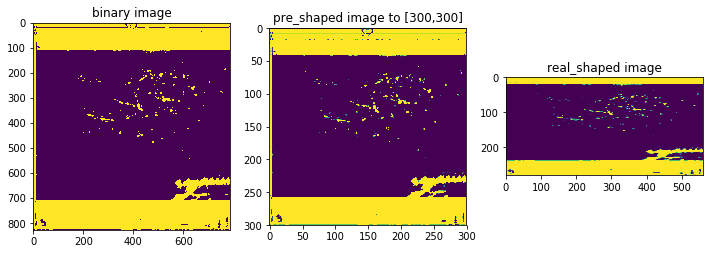

In [76]:
'''Functions call'''

path = "H:/ali/overview_2/Komponent2/xz.png"

#https://www.w3schools.com/colors/colors_hsl.asp

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound=  [50,255,255] # for more defects the upper bound can go till ~105

res = defect_detection(path,lower_bound,upper_bound,[150,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,1,255,cv2.THRESH_BINARY) 

title = 'Global Thresholding (v = 1)'
image = thresh

'''shaping'''

img = pre_shaping(image,resol = [300,300])
images = [image,img,real_shaping(img,280,560)]#i,j --> y,x
titles = ['binary image','pre_shaped image to [300,300]','real_shaped image']

multiple_imshow(1,3,images ,titles)

In [77]:
def defect_centers(shaped_img):
    
    img = shaped_img
    img[img>0]= 255
   
    return img


In [80]:

component_2_img = real_shaping(img,280,560)
print(component_2_img.shape)

(280L, 560L)


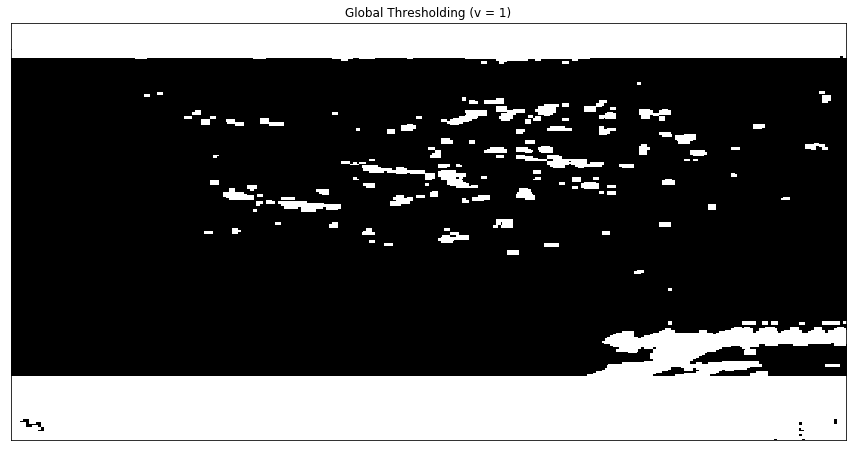

In [81]:
res = defect_centers(component_2_img)
image = res

plt.figure(1, figsize=(12, 12))
plt.imshow(image,'gray')
plt.title(title)
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

### Results

In [82]:
def add_neighbours_in_stack(image, a, b, stack, i, j, inComponent):

    inComponent[i, j] = True
    neighbours = [(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    for (k,l) in neighbours:
        if 0<=k<image.shape[0] and 0<=l<image.shape[1]:
            if (image[k,l]>a and image[k,l]<b) and not inComponent[k, l]:
                inComponent[k, l] = True
                stack.append((k,l))

def connected_component_nb(image, seuil, i0,j0, inComponent):
    stack = [(i0,j0)]
    nb=1
    barycentre = [i0,j0]
    while len(stack)>0:
        (i,j) = stack.pop()
        nb+=1  
        add_neighbours_in_stack(image, seuil, 256, stack, i, j, inComponent)
        
        
        barycentre[0] += i
        barycentre[1] += j
            
    barycentre[0] /= nb
    barycentre[1] /= nb   
    return nb, barycentre


def all_connected_components(image, seuil):

    inComponent = np.empty(image.shape, dtype=np.bool)
    inComponent[:, :] = False

    baryAndSizes = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>seuil and not inComponent[i,j]:
                baryAndSizes.append(connected_component_nb(image,seuil,i,j,inComponent))
                

    return baryAndSizes


def step2(image):
    
    imageR = image
    imageB = image
    
    fig, ax = plt.subplots(1,2, figsize = (22,12))
    fig.suptitle('Results', fontsize=16)
    ax[0].set_xlim(0,imageR.shape[1])
    ax[1].set_xlim(0,imageB.shape[1])

    baryAndSizesR = all_connected_components(imageR, 1)
    baryAndSizesB = all_connected_components(imageB, 1)
    
    xR, xB = np.array([]), np.array([])
    yR, yB = np.array([]), np.array([])
    sizeR, sizeB = np.array([]), np.array([])
    
    for i in range(len(baryAndSizesR)):
        xR = np.append(xR, baryAndSizesR[i][1][0])
        yR = np.append(yR, baryAndSizesR[i][1][1])
        sizeR = np.append(sizeR, baryAndSizesB[i][0])
    
    for i in range(len(baryAndSizesB)):
        xB = np.append(xB, baryAndSizesB[i][1][0])
        yB = np.append(yB, baryAndSizesB[i][1][1])
        sizeB = np.append(sizeB, baryAndSizesB[i][0])
    
    title = ['Detected defects centers','Detected defects as discs']
    ax[0].imshow(imageR, cmap='gray', vmin = 0, vmax = 255,)
    ax[0].scatter(yR, xR, marker='+', s=sizeR, c = 'r', alpha = 0.5)
    ax[0].set_title(title[0])
    
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    ax[1].imshow(imageB, cmap='gray', vmin = 0, vmax = 255,)
    ax[1].scatter(yB, xB, marker='o', s=sizeB, c = 'b', alpha = 0.5)
    ax[1].set_title(title[1])
    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
           
    plt.show()
    
    return yR, xR, sizeR
    

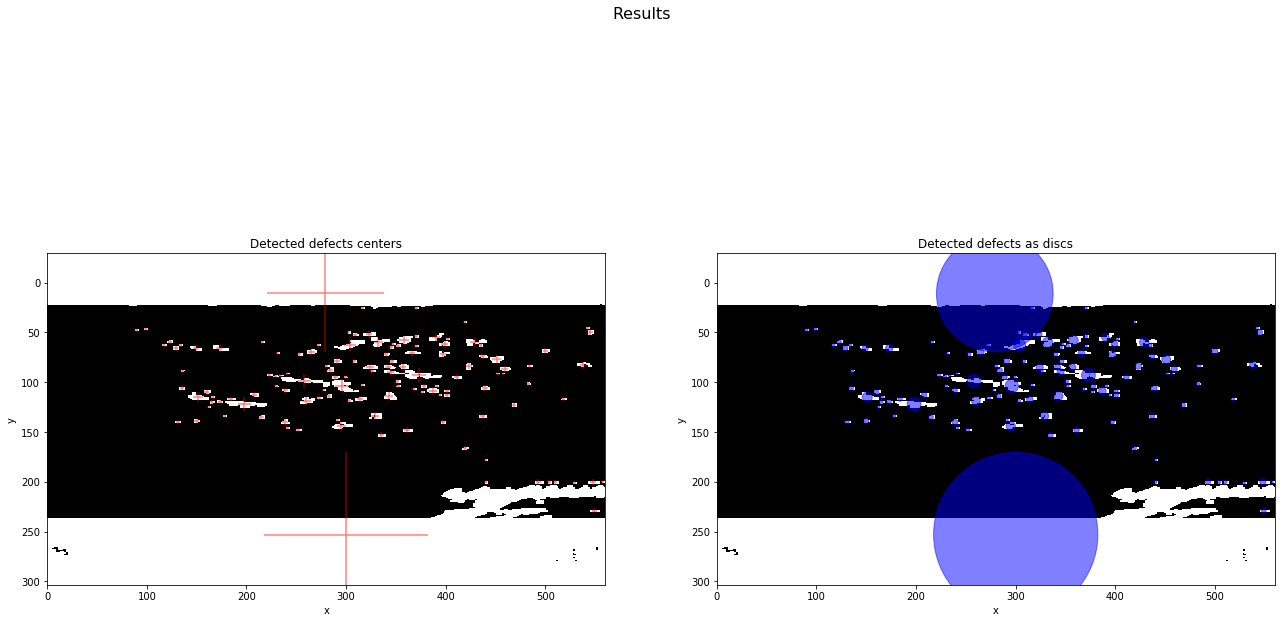

In [83]:
'''Call function'''
image = component_2_img
x, y,area = step2(image)

In [89]:

coord = np.stack((x, y), axis=-1)
print(len(coord))
print('cordinates are =',coord)
print('area is =',area)
print(len(area)== len(coord))


127
('cordinates are =', array([[279.,  11.],
       [316.,  26.],
       [370.,  26.],
       [419.,  40.],
       [542.,  46.],
       [ 99.,  47.],
       [ 90.,  48.],
       [545.,  50.],
       [302.,  50.],
       [323.,  52.],
       [309.,  53.],
       [390.,  55.],
       [370.,  54.],
       [358.,  58.],
       [332.,  60.],
       [402.,  57.],
       [429.,  60.],
       [123.,  60.],
       [304.,  63.],
       [216.,  60.],
       [399.,  62.],
       [347.,  62.],
       [117.,  63.],
       [134.,  63.],
       [272.,  63.],
       [352.,  64.],
       [435.,  63.],
       [173.,  66.],
       [370.,  64.],
       [129.,  66.],
       [149.,  66.],
       [345.,  65.],
       [265.,  70.],
       [500.,  69.],
       [366.,  71.],
       [397.,  72.],
       [231.,  71.],
       [253.,  72.],
       [340.,  72.],
       [437.,  74.],
       [451.,  77.],
       [291.,  79.],
       [308.,  79.],
       [346.,  79.],
       [538.,  83.],
       [423.,  84.],
       [3

### Data reduction

In [90]:
def data_reduction(polygon,coordinates,area):
    old_dim = len(coordinates)
    p = pth.Path(polygon)
    mask = p.contains_points(coordinates)
    reduced_coord = coordinates[mask]
    reduced_area = area[mask]
    new_dim = len(reduced_coord)
    print(old_dim-new_dim,' values were reduced')
    return reduced_coord,reduced_area

In [91]:
'''Function call'''

area = area
coordinates = coord
polygon = np.array([[0,35],[560,35],[560,200],[0,200]])
reduced_coord, reduced_area = data_reduction(polygon,coordinates,area)

(6, ' values were reduced')


In [92]:
print(len(reduced_coord))

121


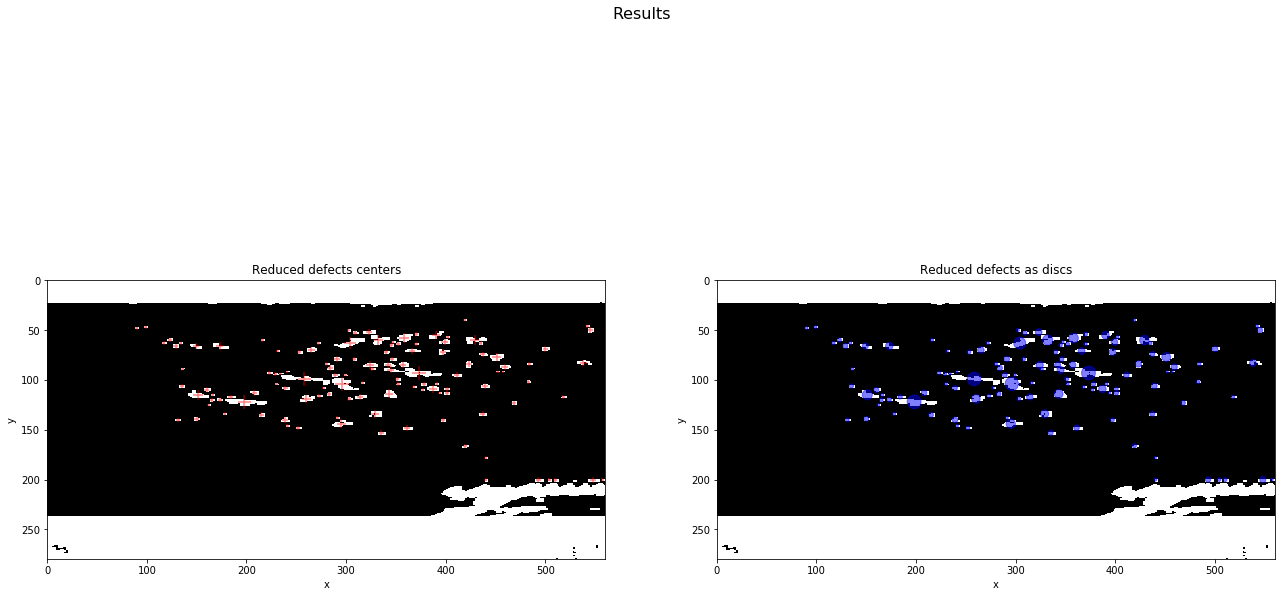

In [94]:
fig, ax = plt.subplots(1,2, figsize = (22,12))
fig.suptitle('Results', fontsize=16)
ax[0].set_xlim(0,image.shape[1])
ax[1].set_xlim(0,image.shape[1])
    
title = ['Reduced defects centers','Reduced defects as discs']
ax[0].imshow(image, cmap='gray', vmin = 0, vmax = 255,)
ax[0].scatter(reduced_coord[:,0], reduced_coord[:,1], marker='+', s=reduced_area, c = 'r', alpha = 0.5)
ax[0].set_title(title[0])

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].imshow(image, cmap='gray', vmin = 0, vmax = 255,)
ax[1].scatter(reduced_coord[:,0], reduced_coord[:,1], marker='o', s=reduced_area, c = 'b', alpha = 0.5)
ax[1].set_title(title[1])

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.show()